In [ ]:
#Import library yang dibutuhkan
import pandas as pd

#Read data
data =  pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv')
data

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,17/10/2019,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10.0,740000.0
1,1706815,24/10/2019,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2.0,604000.0
2,1710718,03/11/2019,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8.0,1045000.0
3,1683592,19/08/2019,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4.0,205000.0
4,1702573,16/10/2019,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2.0,NaN
...,...,...,...,...,...,...,...,...,...
4995,1724011,01/12/2019,12838,Tangerang,Banten,P3047,BRAND_R,2.0,450000.0
4996,1676302,28/07/2019,13833,Bogor,Jawa Barat,P0760,BRAND_C,3.0,1465000.0
4997,1706071,23/10/2019,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4.0,747000.0
4998,1703620,17/10/2019,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8.0,695000.0


In [3]:
#Mengubah tipedata (memastikan tipedata sesuai dengan data aslinya)
#1. string atau object menjadi datetime
data['order_date'] = pd.to_datetime(data['order_date'], dayfirst=True)

#2. integer menjadi string
data[['order_id','customer_id']] = data[['order_id','customer_id']].astype('str')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     5000 non-null   object        
 1   order_date   5000 non-null   datetime64[ns]
 2   customer_id  5000 non-null   object        
 3   city         4984 non-null   object        
 4   province     4988 non-null   object        
 5   product_id   4989 non-null   object        
 6   brand        5000 non-null   object        
 7   quantity     4986 non-null   float64       
 8   item_price   4987 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 351.7+ KB


# **Pertanyaan 1** : Membuat heatmap matriks korelasi dengan anotasi

In [10]:
#Tampilkan matriks korelasi
matrikskorelasi = data.corr()
matrikskorelasi

,quantity,item_price
quantity,1.000000,-0.133936
item_price,-0.133936,1.000000


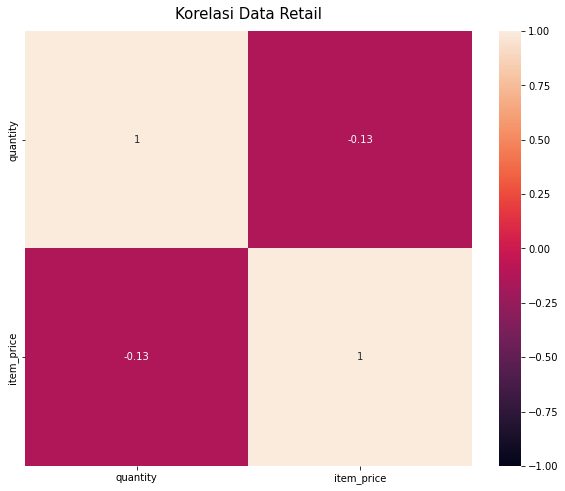

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur panjang dan lebar grafik
plt.figure(figsize=(10, 8))

# Mengatur rentang nilai yang ingin ditampilkan dari -1 (vmin) sampai 1 (vmax). Annot = True berarti menampilkan anotasi (nilai eksak korelasi pada grafik)
heatmap = sns.heatmap(matrikskorelasi, vmin = -1, vmax = 1, annot = True)

# Menambahkan judul pada grafik
heatmap.set_title('Korelasi Data Retail', fontdict={'fontsize' : 15}, pad = 12);

# **Pertanyaan 2** : Menampilkan anotasi nilai pada grafik

In [35]:
import datetime as dt

#Untuk mendapatkan bulan dan tahun pada kolom order_date (string/object -> datetime)
data['order_month'] = data['order_date'].astype('str').apply(lambda x: dt.datetime.strptime(x,"%Y-%m-%d").strftime('%Y-%m'))

#Tambahkan kolom gmv (hasil perkalian harga barang dan kuantitas)
data['gmv'] = data['item_price'] * data['quantity']

#Tampilkan data
data

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10.0,740000.0,2019-10,7400000.0
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2.0,604000.0,2019-10,1208000.0
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8.0,1045000.0,2019-11,8360000.0
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4.0,205000.0,2019-08,820000.0
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2.0,NaN,2019-10,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4995,1724011,2019-12-01,12838,Tangerang,Banten,P3047,BRAND_R,2.0,450000.0,2019-12,900000.0
4996,1676302,2019-07-28,13833,Bogor,Jawa Barat,P0760,BRAND_C,3.0,1465000.0,2019-07,4395000.0
4997,1706071,2019-10-23,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4.0,747000.0,2019-10,2988000.0
4998,1703620,2019-10-17,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8.0,695000.0,2019-10,5560000.0


In [38]:
#Hitung jumlah gmv yang dikelompokkan berdasarkan bulan - tahun
totalgmvpermonth = data.groupby('order_month')['gmv'].sum().reset_index()

#Tampilkan data
totalgmvpermonth

,order_month,gmv
0,2019-07,3.494561e+09
1,2019-08,4.448638e+09
2,2019-09,3.937725e+09
3,2019-10,6.635781e+09
4,2019-11,6.178094e+09
5,2019-12,8.092659e+09


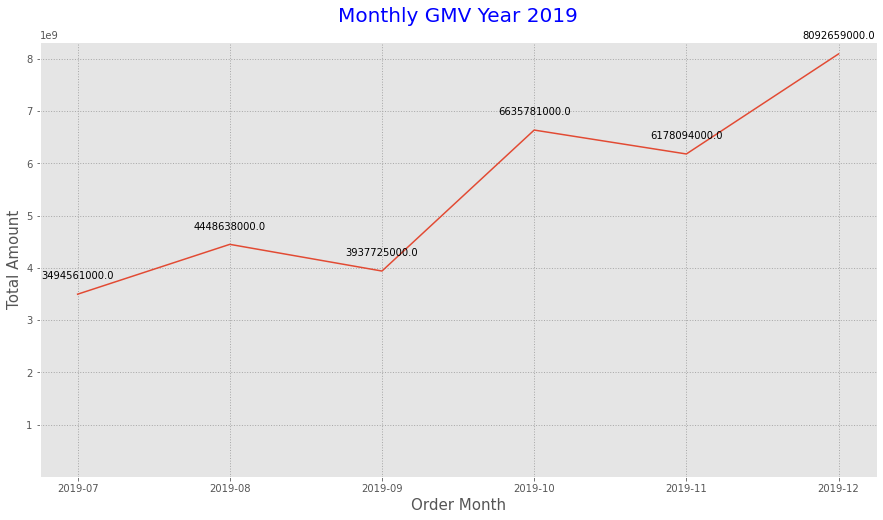

In [64]:
import matplotlib.pyplot as plt
import numpy as np

#Definisikan nilai
nilaix = totalgmvpermonth['order_month']
nilaiy = totalgmvpermonth['gmv']

#Mengatur panjang - lebar tampilan
plt.figure(figsize=(15, 8))

#Plot grafik
plt.plot(nilaix, nilaiy)

#Menambahkan judul pada grafik
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')

#Menambahkan label/keterangan pada x-axis
plt.xlabel('Order Month', fontsize=15)

#Menambahkan label/keterangan pada y-axis
plt.ylabel('Total Amount', fontsize=15)

#Tambahkan grid (garis bantu bayangan) dengan ketebalan 1 dan tipe garis = :
plt.grid(color='darkgray', linestyle=':', linewidth=1)

#Seting plot grafik dengan nilai minimum pada y sebesar 10
plt.ylim(ymin = 20)

# Menampilkan anotasi per masing2 titik
for x,y in zip(nilaix, nilaiy):
    plt.annotate(y,                           # Nilai anotasi yang ingin ditampilkan
                 (x,y),                       # Nilai x dan y pada grafik
                 textcoords="offset points",  # Posisi teks anotasi
                 xytext = (0,15),             # Jarak teks ke titik
                 ha='center')                 # Mengatur posisi anotasi

# **Pertanyaan 3** : Menggambar Grafik dalam 1 Frame

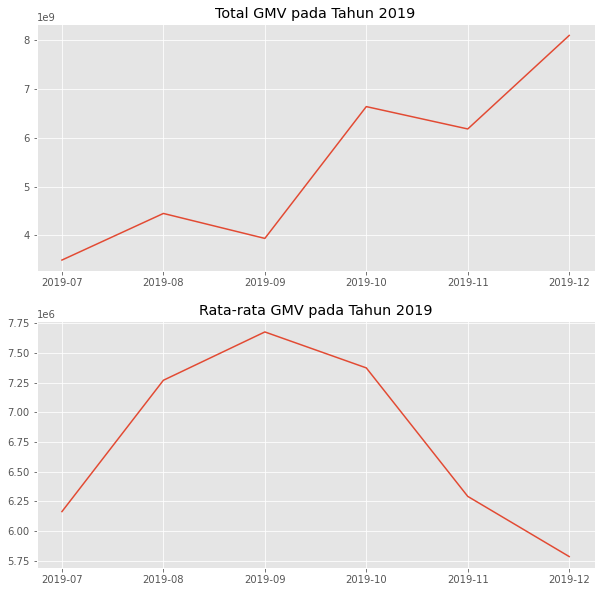

In [69]:
import matplotlib.pyplot as plt

#Lakukan penjumlahan kolom 'gmv' lalu kelompokkan berdasarkan kolom order_month
datasum = data.groupby(['order_month'])['gmv'].sum().reset_index()  #jumlah gmv per bulan - tahun
dataavg = data.groupby(['order_month'])['gmv'].mean().reset_index() #rataan gmv per bulan - tahun

#definisikan variabel yang akan di plot
x = datasum['order_month']
y = datasum['gmv']
z = dataavg['gmv']

# Buat 2 plot dalam satu figure
fig, (ax1, ax2) = plt.subplots(2)

#ubah size figurenya
fig.set_figheight(10)
fig.set_figwidth(10)

#Beri title
ax1.title.set_text('Total GMV pada Tahun 2019')
ax2.title.set_text('Rata-rata GMV pada Tahun 2019')

#plot hasil
ax1.plot(x, y)
ax2.plot(x, z)

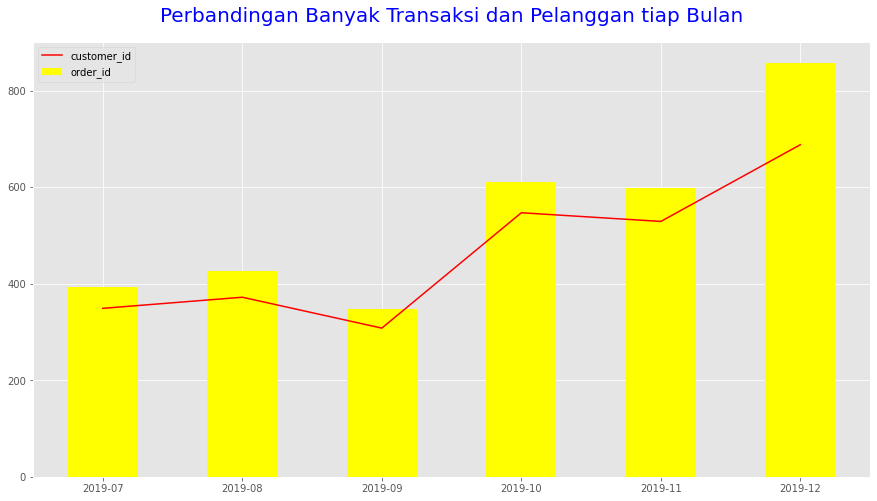

In [102]:
import matplotlib.pyplot as plt

#Definisikan data
sumtrx  = data.groupby(['order_month'])['order_id'].nunique().reset_index()    
sumcust = data.groupby(['order_month'])['customer_id'].nunique().reset_index()

#Atur tampilan
width = 0.5
plt.figure(figsize=(15, 8)) 

#Menggabungkan antara bar char dan line chart
sumtrx['order_id'].plot(kind='bar', width = width, color = 'yellow')
sumcust['customer_id'].plot(color = 'red')

#Menambahkan anatomi lain pada grafik
plt.title('Perbandingan Banyak Transaksi dan Pelanggan tiap Bulan', loc='center', pad=20, fontsize=20, color='blue')
plt.legend()
ax = plt.gca()
ax.set_xticklabels(datasum['order_month'])

plt.show()